In [1]:
import os
import re
from glob import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files = glob('benchmark/*/*.json')
files = [f for f in files if 'warmup' not in f]

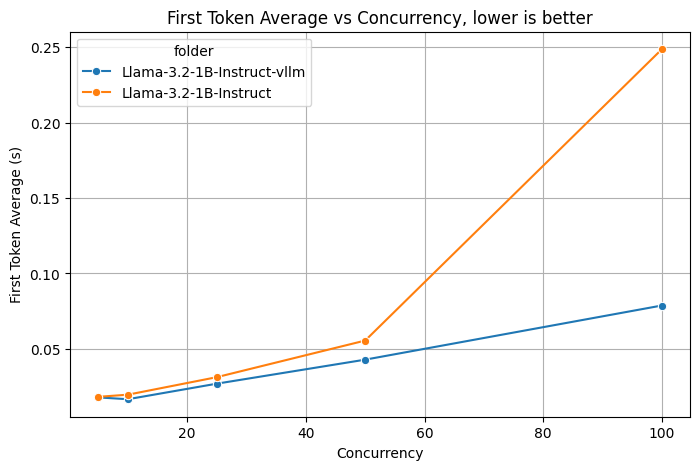

In [ ]:
data = []

for f in files:
    folder = os.path.basename(os.path.dirname(f))
    match = re.search(r'(\d+)concurrency', os.path.basename(f))
    if not match:
        continue
    concurrency = int(match.group(1))

    with open(f) as fopen:
        d = json.load(fopen)
    
    first_token_avg = d.get('first_token_avg', None)
    if first_token_avg is not None:
        data.append({'folder': folder, 'concurrency': concurrency, 'first_token_avg': first_token_avg})

df = pd.DataFrame(data)

plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Concurrency', y='first_token_avg', hue='folder', marker='o')
plt.title('First Token Average vs Concurrency, lower is better')
plt.xlabel('Concurrency')
plt.ylabel('First Token Average (s)')
plt.grid(True)
plt.show()

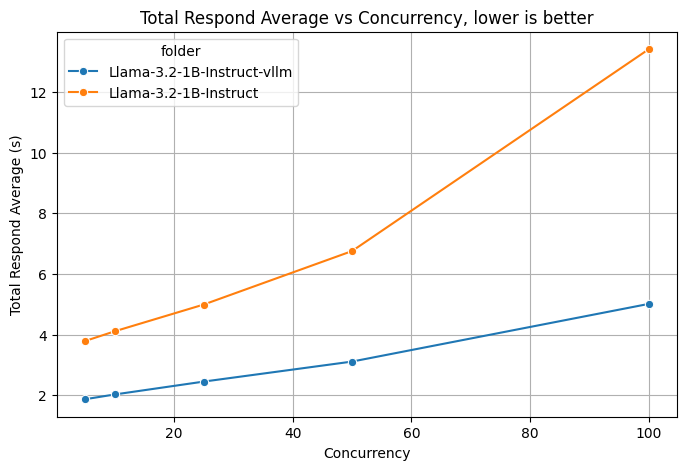

In [ ]:
data = []

for f in files:
    folder = os.path.basename(os.path.dirname(f))
    match = re.search(r'(\d+)concurrency', os.path.basename(f))
    if not match:
        continue
    concurrency = int(match.group(1))

    with open(f) as fopen:
        d = json.load(fopen)
    
    total_response_avg = d.get('total_response_avg', None)
    if first_token_avg is not None:
        data.append({'folder': folder, 'concurrency': concurrency, 'total_response_avg': total_response_avg})

df = pd.DataFrame(data)

plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='concurrency', y='total_response_avg', hue='folder', marker='o')
plt.title('Total Respond Average vs Concurrency, lower is better')
plt.xlabel('Concurrency')
plt.ylabel('Total Respond Average (s)')
plt.grid(True)
plt.show()